In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(verbose = True)

*** GP2  Unet ***
Working directory: /tmp/tmpka4acmcyGP2


In [4]:
# load our dataset  (images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

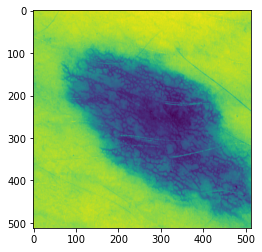

In [5]:
plt.imshow(images[4])

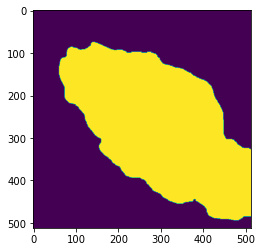

In [6]:
plt.imshow(masks[4])

In [7]:
images.shape

(20030, 512, 512, 1)

In [8]:
masks.shape

(20030, 512, 512, 1)

In [9]:
images = images[:8000]

In [10]:
masks = masks[:8000]

In [11]:
R.run(images=images, masks=masks, runs=5, use_multi_gpu=True)

Number of devices: 2
Weights OK!
******
Loop 1
Epoch 1/100
7/7 [==============================] - 30s 2s/step - loss: 1.2705 - dice_coeff: 0.3377 - val_loss: 1.4446 - val_dice_coeff: 0.2492
Epoch 2/100
7/7 [==============================] - 10s 2s/step - loss: 1.0096 - dice_coeff: 0.4484 - val_loss: 1.4515 - val_dice_coeff: 0.2488
Epoch 3/100
7/7 [==============================] - 10s 2s/step - loss: 0.9089 - dice_coeff: 0.4853 - val_loss: 1.4550 - val_dice_coeff: 0.2483
Epoch 4/100
7/7 [==============================] - 10s 2s/step - loss: 0.8847 - dice_coeff: 0.4747 - val_loss: 1.4524 - val_dice_coeff: 0.2478
Epoch 5/100
7/7 [==============================] - 10s 2s/step - loss: 0.8365 - dice_coeff: 0.4872 - val_loss: 1.4491 - val_dice_coeff: 0.2474
Epoch 6/100
7/7 [==============================] - 10s 2s/step - loss: 0.7976 - dice_coeff: 0.5223 - val_loss: 1.4432 - val_dice_coeff: 0.2476
Epoch 7/100
7/7 [==============================] - 10s 2s/step - loss: 0.7898 - dice_coeff: 0.5

In [12]:
R.classifier_scores

[[1.4046064615249634, 0.2516075372695923],
 [1.3669039011001587, 0.2216409593820572],
 [1.3379721641540527, 0.19598565995693207]]

In [13]:
R.discriminator_scores

[[0.0, 1.0],
 [0.209229975938797, 0.9708333611488342],
 [6.268530368804932, 0.49791666865348816]]

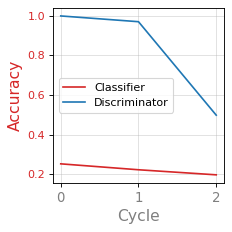

In [14]:
R.plot()